# Task-03 : Sales Analysis 

## Introduction:

### Objective:

The objective of the dataset is to provide insights into sales transactions for a company, detailing information about orders, customers, shipping, products, and financials. This data can be used for various analyses, such as sales performance, customer behavior, shipping efficiency, profitability, and market trends.

## Step 01 : Import Necessary Libraries

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

## Step 02 : Import the Dataset

In [4]:
df = pd.read_excel("superstore_sales.xlsx")

## Step 03 : Data Assessment

In [5]:
# first five rows of the dataset
df.head()

,order_id,order_date,ship_date,ship_mode,customer_name,segment,state,country,market,region,...,category,sub_category,product_name,sales,quantity,discount,profit,shipping_cost,order_priority,year
0,AG-2011-2040,2011-01-01,2011-01-06,Standard Class,Toby Braunhardt,Consumer,Constantine,Algeria,Africa,Africa,...,Office Supplies,Storage,"Tenex Lockers, Blue",408.300,2,0.0,106.140,35.46,Medium,2011
1,IN-2011-47883,2011-01-01,2011-01-08,Standard Class,Joseph Holt,Consumer,New South Wales,Australia,APAC,Oceania,...,Office Supplies,Supplies,"Acme Trimmer, High Speed",120.366,3,0.1,36.036,9.72,Medium,2011
2,HU-2011-1220,2011-01-01,2011-01-05,Second Class,Annie Thurman,Consumer,Budapest,Hungary,EMEA,EMEA,...,Office Supplies,Storage,"Tenex Box, Single Width",66.120,4,0.0,29.640,8.17,High,2011
3,IT-2011-3647632,2011-01-01,2011-01-05,Second Class,Eugene Moren,Home Office,Stockholm,Sweden,EU,North,...,Office Supplies,Paper,"Enermax Note Cards, Premium",44.865,3,0.5,-26.055,4.82,High,2011
4,IN-2011-47883,2011-01-01,2011-01-08,Standard Class,Joseph Holt,Consumer,New South Wales,Australia,APAC,Oceania,...,Furniture,Furnishings,"Eldon Light Bulb, Duo Pack",113.670,5,0.1,37.770,4.70,Medium,2011


In [6]:
# last five rows of the dataset
df.tail()

,order_id,order_date,ship_date,ship_mode,customer_name,segment,state,country,market,region,...,category,sub_category,product_name,sales,quantity,discount,profit,shipping_cost,order_priority,year
51285,CA-2014-115427,2014-12-31,2015-01-04,Standard Class,Erica Bern,Corporate,California,United States,US,West,...,Office Supplies,Binders,"Cardinal Slant-D Ring Binder, Heavy Gauge Vinyl",13.904,2,0.2,4.5188,0.890,Medium,2014
51286,MO-2014-2560,2014-12-31,2015-01-05,Standard Class,Liz Preis,Consumer,Souss-Massa-Draâ,Morocco,Africa,Africa,...,Office Supplies,Binders,"Wilson Jones Hole Reinforcements, Clear",3.990,1,0.0,0.4200,0.490,Medium,2014
51287,MX-2014-110527,2014-12-31,2015-01-02,Second Class,Charlotte Melton,Consumer,Managua,Nicaragua,LATAM,Central,...,Office Supplies,Labels,"Hon Color Coded Labels, 5000 Label Set",26.400,3,0.0,12.3600,0.350,Medium,2014
51288,MX-2014-114783,2014-12-31,2015-01-06,Standard Class,Tamara Dahlen,Consumer,Chihuahua,Mexico,LATAM,North,...,Office Supplies,Labels,"Hon Legal Exhibit Labels, Alphabetical",7.120,1,0.0,0.5600,0.199,Medium,2014
51289,CA-2014-156720,2014-12-31,2015-01-04,Standard Class,Jill Matthias,Consumer,Colorado,United States,US,West,...,Office Supplies,Fasteners,Bagged Rubber Bands,3.024,3,0.2,-0.6048,0.170,Medium,2014


In [7]:
# shape of the dataset
df.shape

(51290, 21)

In [8]:
# columns present in the dataset
df.columns

Index(['order_id', 'order_date', 'ship_date', 'ship_mode', 'customer_name',
       'segment', 'state', 'country', 'market', 'region', 'product_id',
       'category', 'sub_category', 'product_name', 'sales', 'quantity',
       'discount', 'profit', 'shipping_cost', 'order_priority', 'year'],
      dtype='object')

In [9]:
# A concise summary of the dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51290 entries, 0 to 51289
Data columns (total 21 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   order_id        51290 non-null  object        
 1   order_date      51290 non-null  datetime64[ns]
 2   ship_date       51290 non-null  datetime64[ns]
 3   ship_mode       51290 non-null  object        
 4   customer_name   51290 non-null  object        
 5   segment         51290 non-null  object        
 6   state           51290 non-null  object        
 7   country         51290 non-null  object        
 8   market          51290 non-null  object        
 9   region          51290 non-null  object        
 10  product_id      51290 non-null  object        
 11  category        51290 non-null  object        
 12  sub_category    51290 non-null  object        
 13  product_name    51290 non-null  object        
 14  sales           51290 non-null  float64       
 15  qu

# Step 04 : Data Cleaning

In [11]:
# Checking for missing values in the dataset
df.isnull().sum()

order_id          0
order_date        0
ship_date         0
ship_mode         0
customer_name     0
segment           0
state             0
country           0
market            0
region            0
product_id        0
category          0
sub_category      0
product_name      0
sales             0
quantity          0
discount          0
profit            0
shipping_cost     0
order_priority    0
year              0
month_year        0
dtype: int64

In [12]:
# Descriptive Statistics Summary of the dataset
df.describe()

,order_date,ship_date,sales,quantity,discount,profit,shipping_cost,year
count,51290,51290,51290.000000,51290.000000,51290.000000,51290.000000,51290.000000,51290.000000
mean,2013-05-11 21:26:49.155780864,2013-05-15 20:42:42.745174528,246.490581,3.476545,0.142908,28.641740,26.375818,2012.777208
min,2011-01-01 00:00:00,2011-01-03 00:00:00,0.444000,1.000000,0.000000,-6599.978000,0.002000,2011.000000
25%,2012-06-19 00:00:00,2012-06-23 00:00:00,30.758625,2.000000,0.000000,0.000000,2.610000,2012.000000
50%,2013-07-08 00:00:00,2013-07-12 00:00:00,85.053000,3.000000,0.000000,9.240000,7.790000,2013.000000
75%,2014-05-22 00:00:00,2014-05-26 00:00:00,251.053200,5.000000,0.200000,36.810000,24.450000,2014.000000
max,2014-12-31 00:00:00,2015-01-07 00:00:00,22638.480000,14.000000,0.850000,8399.976000,933.570000,2014.000000
std,NaN,NaN,487.565361,2.278766,0.212280,174.424113,57.296810,1.098931


# Step 05 : Data Exploration

## Overall Sales Trend

In [13]:
df['order_date'].min()

Timestamp('2011-01-01 00:00:00')

In [14]:
df['order_date'].max()

Timestamp('2014-12-31 00:00:00')

In [15]:
# Getting month year from the dataset
df['month_year'] = df['order_date'].apply(lambda x: x.strftime('%Y-%m'))

In [19]:
# Group by 'month_year' and aggregate sales
df_trend = df.groupby('month_year')['sales'].sum().reset_index()
df_trend

,month_year,sales
0,2011-01,98898.48886
1,2011-02,91152.15698
2,2011-03,145729.36736
3,2011-04,116915.76418
4,2011-05,146747.83610
5,2011-06,215207.38022
6,2011-07,115510.41912
7,2011-08,207581.49122
8,2011-09,290214.45534
9,2011-10,199071.26404


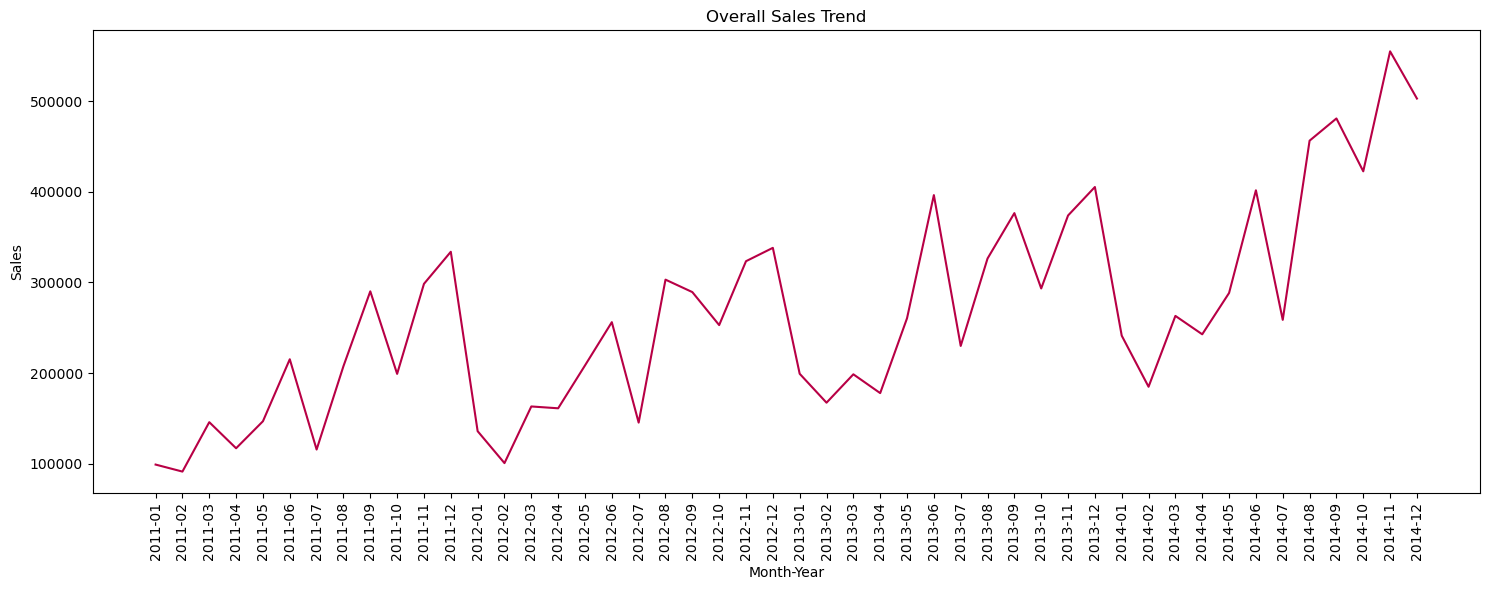

In [25]:
# Plot overall sales trend
plt.figure(figsize=(15, 6))
plt.plot(df_trend['month_year'].astype(str), df_trend['sales'], color='#b80045')
plt.xticks(rotation=90)
plt.xlabel('Month-Year')
plt.ylabel('Sales')
plt.title('Overall Sales Trend')
plt.tight_layout()
plt.show()

## Top 10 Products by Sales

In [31]:
# Grouping products by sales
top_10_products = df.groupby('product_name')['sales'].sum().nlargest(10).reset_index()
# Top 10 products by sales
print("Top 10 Products by Sales:")
print(top_10_products)

Top 10 Products by Sales:
                                        product_name       sales
0                       Apple Smart Phone, Full Size  86935.7786
1                       Cisco Smart Phone, Full Size  76441.5306
2                    Motorola Smart Phone, Full Size  73156.3030
3                       Nokia Smart Phone, Full Size  71904.5555
4              Canon imageCLASS 2200 Advanced Copier  61599.8240
5         Hon Executive Leather Armchair, Adjustable  58193.4841
6  Office Star Executive Leather Armchair, Adjust...  50661.6840
7  Harbour Creations Executive Leather Armchair, ...  50121.5160
8                      Samsung Smart Phone, Cordless  48653.4600
9                  Nokia Smart Phone, with Caller ID  47877.7857


## Most Selling Products

In [32]:
# Grouping products by Quantity
top_10_selling_prods = df.groupby('product_name')['quantity'].sum().nlargest(10).reset_index()
# Top 10 products by sales
print("\nTop 10 Most Selling Products:")
print(top_10_selling_prods)


Top 10 Most Selling Products:
                            product_name  quantity
0                                Staples       876
1              Cardinal Index Tab, Clear       337
2          Eldon File Cart, Single Width       321
3         Rogers File Cart, Single Width       262
4  Sanford Pencil Sharpener, Water Color       259
5  Stockwell Paper Clips, Assorted Sizes       253
6                 Avery Index Tab, Clear       252
7                 Ibico Index Tab, Clear       251
8          Smead File Cart, Single Width       250
9  Stanley Pencil Sharpener, Water Color       242


## Most Preferred Ship Mode

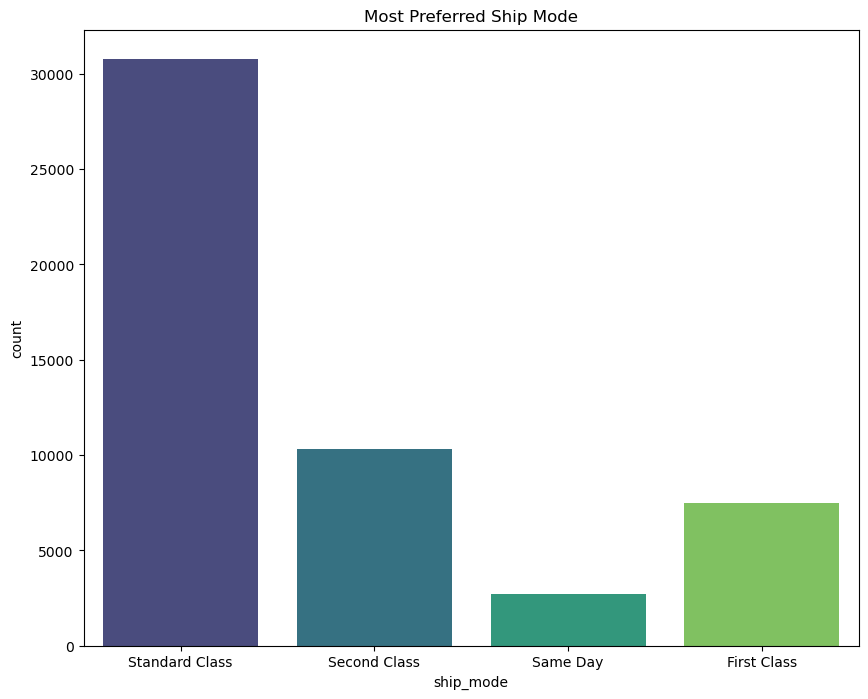

In [34]:
# Setting the figure size
plt.figure(figsize=(10, 8))
# countplot: Show the counts of observations in each categorical bin using bars
sns.countplot(x='ship_mode', data=df, palette='viridis')

plt.title('Most Preferred Ship Mode')
plt.show()

## Most Profitable Category and Sub-Category


In [37]:
# Grouping products by Category and Sub-Category
cat_subcat_sorted = df.groupby(['category', 'sub_category'])['profit'].sum().reset_index()
# Sorting first by 'category' and then by 'profit' in descending order within each category
cat_subcat_sorted = cat_subcat_sorted.sort_values(by=['category', 'profit'], ascending=[True, False])
print("\nMost Profitable Category and Sub-Category:")
print(cat_subcat_sorted)


Most Profitable Category and Sub-Category:
           category sub_category        profit
0         Furniture    Bookcases  161924.41950
1         Furniture       Chairs  141973.79750
2         Furniture  Furnishings   46967.42550
3         Furniture       Tables  -64083.38870
4   Office Supplies   Appliances  141680.58940
11  Office Supplies      Storage  108461.48980
6   Office Supplies      Binders   72449.84600
10  Office Supplies        Paper   59207.68270
5   Office Supplies          Art   57953.91090
7   Office Supplies    Envelopes   29601.11630
12  Office Supplies     Supplies   22583.26310
9   Office Supplies       Labels   15010.51200
8   Office Supplies    Fasteners   11525.42410
14       Technology      Copiers  258567.54818
16       Technology       Phones  216717.00580
13       Technology  Accessories  129626.30620
15       Technology     Machines   58867.87300


# Step 06 : Data Visualization

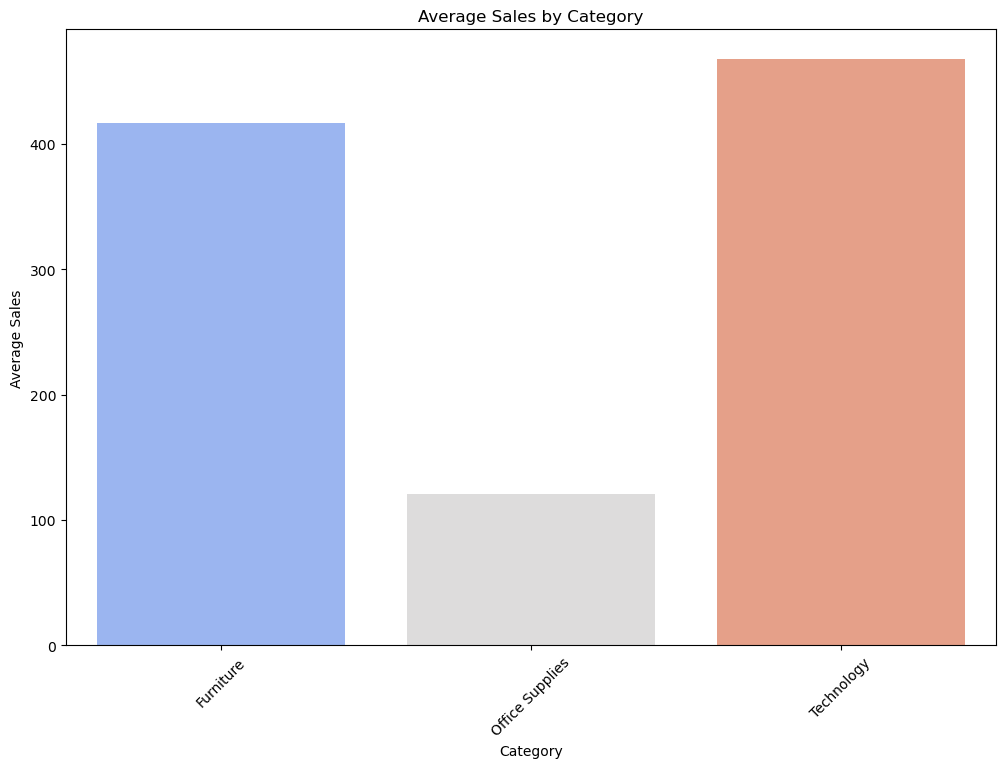

In [40]:
# Sales Distribution by Category
avg_sales_by_category = df.groupby('category')['sales'].mean().reset_index()

plt.figure(figsize=(12, 8))
sns.barplot(x='category', y='sales', data=avg_sales_by_category, palette='coolwarm')
plt.title('Average Sales by Category')
plt.xlabel('Category')
plt.ylabel('Average Sales')
plt.xticks(rotation=45)
plt.show()

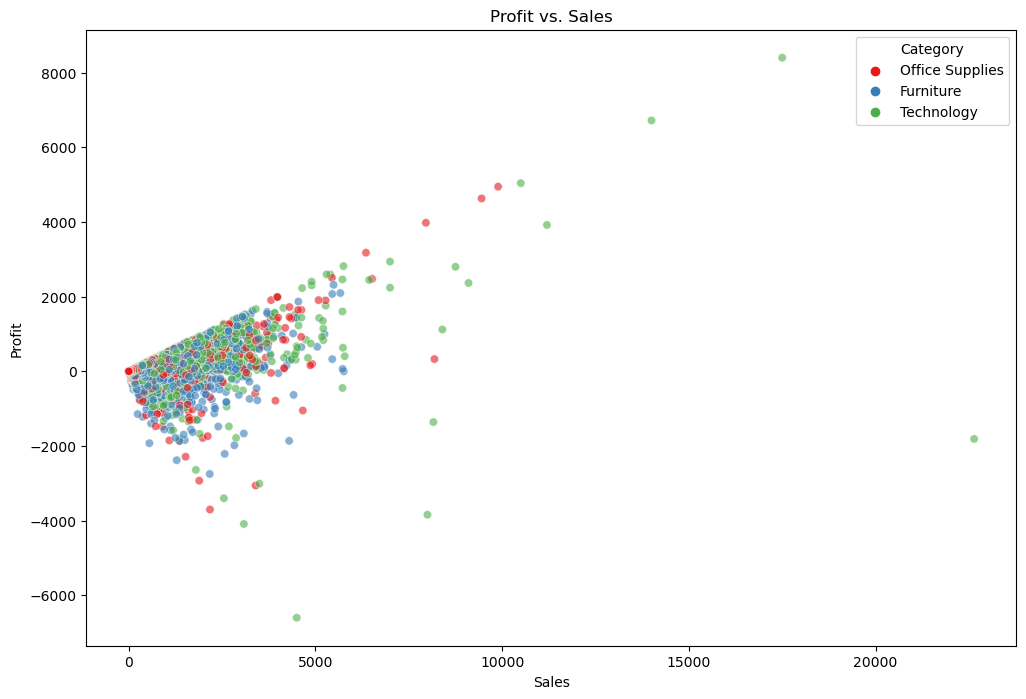

In [41]:
# Profit vs. Sales
plt.figure(figsize=(12, 8))
sns.scatterplot(x='sales', y='profit', data=df, hue='category', palette='Set1', alpha=0.6)
plt.title('Profit vs. Sales')
plt.xlabel('Sales')
plt.ylabel('Profit')
plt.legend(title='Category')
plt.show()

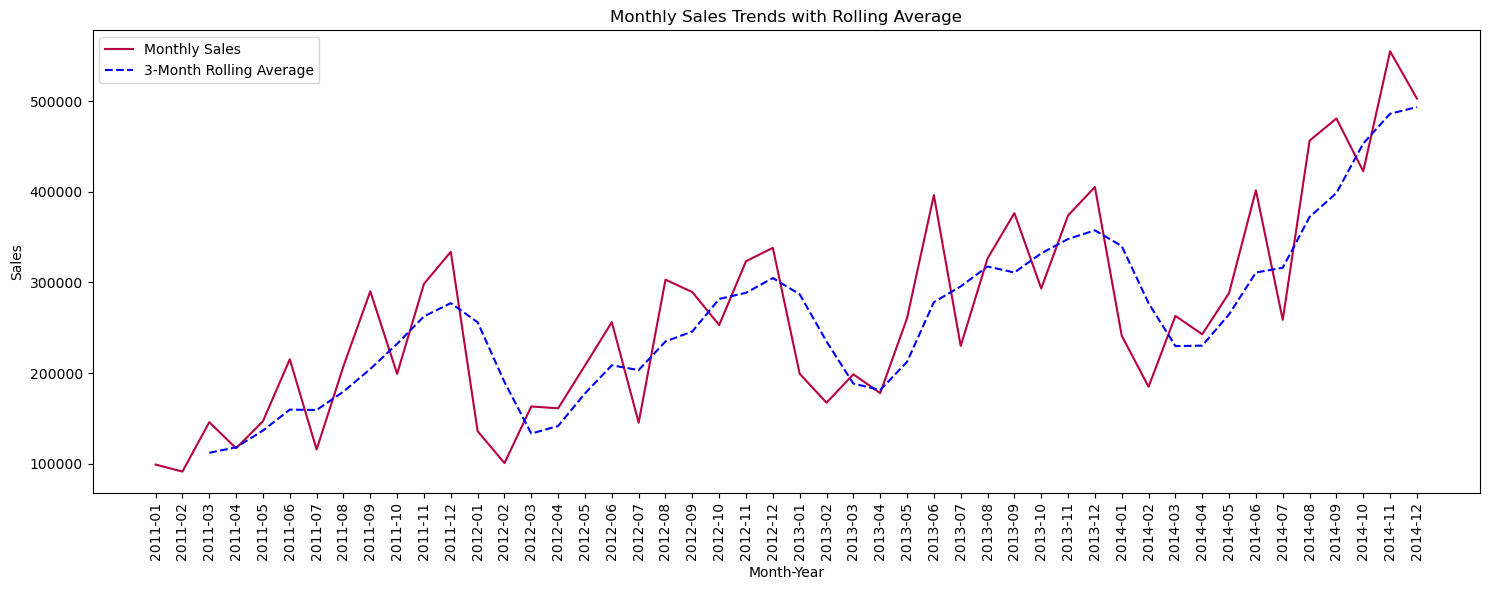

In [42]:
# Monthly Sales Trends with Rolling Average
plt.figure(figsize=(15, 6))
plt.plot(df_trend['month_year'].astype(str), df_trend['sales'], color='#b80045', label='Monthly Sales')
plt.plot(df_trend['month_year'].astype(str), df_trend['sales'].rolling(window=3).mean(), color='blue', linestyle='--', label='3-Month Rolling Average')
plt.xticks(rotation=90)
plt.xlabel('Month-Year')
plt.ylabel('Sales')
plt.title('Monthly Sales Trends with Rolling Average')
plt.legend()
plt.tight_layout()
plt.show()

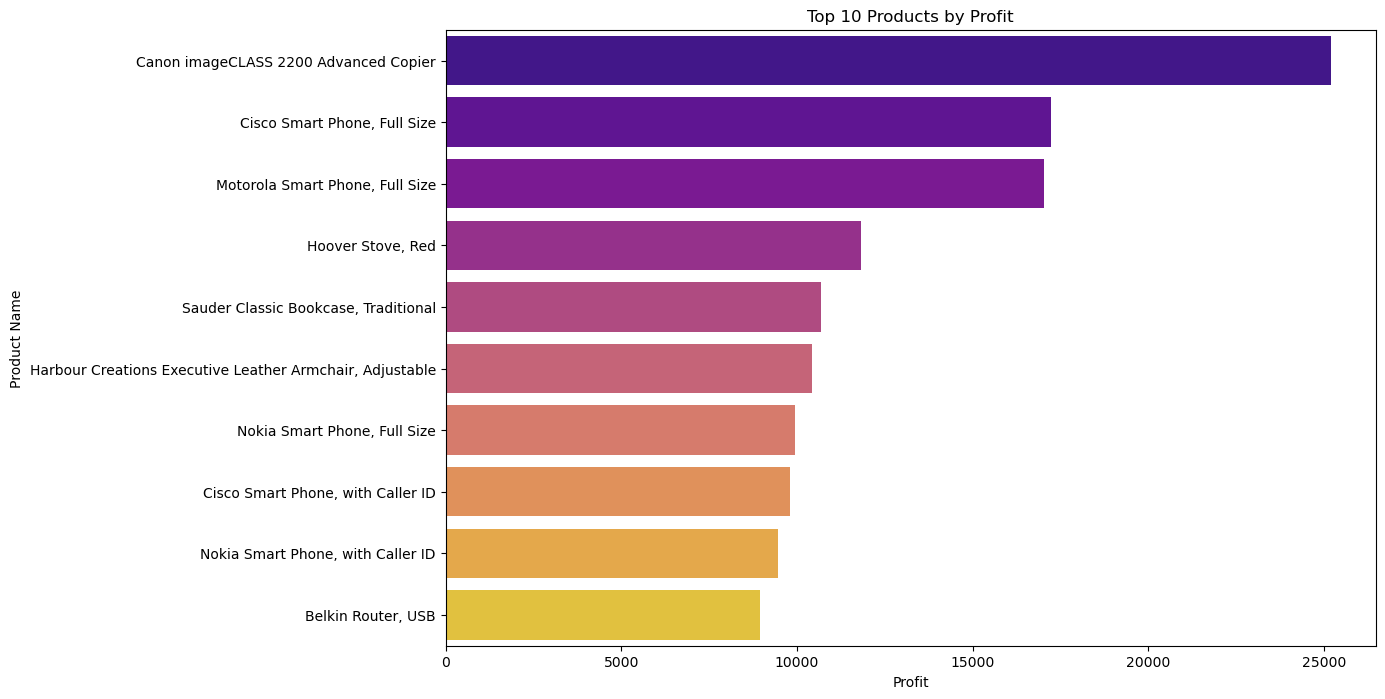

In [43]:
# 4. Top 10 Products by Profit
top_10_profit_products = df.groupby('product_name')['profit'].sum().nlargest(10).reset_index()
plt.figure(figsize=(12, 8))
sns.barplot(x='profit', y='product_name', data=top_10_profit_products, palette='plasma')
plt.title('Top 10 Products by Profit')
plt.xlabel('Profit')
plt.ylabel('Product Name')
plt.show()

## Key Findings:

1. Sales fluctuated over time, with clear periods of growth and decline.
2. Identified the highest revenue-generating products.
3. Highlighted the products sold in the highest quantities.
4. Identified the most commonly used shipping method.
5. Revealed the most profitable product categories and sub-categories.
6. Showed the relationship between sales and profit across different categories.
7. Listed the most profitable products.